In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [77]:
df = pd.read_csv("../Dataset/dataset.csv")

In [78]:
df_test = pd.read_csv("../Dataset/clean_new_data.csv")

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  624 non-null    int64  
 1   JK          624 non-null    int64  
 2   usia ukur   624 non-null    int64  
 3   Berat       624 non-null    float64
 4   Tinggi      624 non-null    float64
 5   ZS BB/U     624 non-null    float64
 6   ZS TB/U     624 non-null    float64
 7   ZS BB/TB    624 non-null    float64
 8   BB/U        624 non-null    object 
 9   TB/U        624 non-null    object 
 10  BB/TB       624 non-null    object 
dtypes: float64(5), int64(3), object(3)
memory usage: 53.8+ KB


In [80]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   JK         600 non-null    int64  
 1   usia ukur  600 non-null    int64  
 2   Berat      600 non-null    float64
 3   Tinggi     600 non-null    float64
 4   LiLA       600 non-null    float64
 5   ZS BB/U    600 non-null    float64
 6   ZS TB/U    600 non-null    float64
 7   ZS BB/TB   600 non-null    float64
 8   BB/U       600 non-null    object 
 9   TB/U       600 non-null    object 
 10  BB/TB      600 non-null    object 
dtypes: float64(6), int64(2), object(3)
memory usage: 51.7+ KB


In [81]:
df.rename(columns={'j_kel':'JK', 'usia_ukur(bulan)':'usia ukur', 'berat':'Berat', 
                   'tinggi':'Tinggi','Z_BB/TB':'ZS BB/TB', 'Z_BB/U':'ZS BB/U', 'Z_TB/U': 'ZS TB/U'}, 
        inplace=True)

In [82]:
df = df[['JK','usia ukur', 'Berat', 'Tinggi', 'ZS BB/U', 'ZS TB/U', 'ZS BB/TB', 'BB/U', 'TB/U', 'BB/TB']]

In [83]:
df.head()

,JK,usia ukur,Berat,Tinggi,ZS BB/U,ZS TB/U,ZS BB/TB,BB/U,TB/U,BB/TB
0,0,58,13.1,97.5,0.52,1.24,-0.53,Normal,Normal,Gizi Baik
1,1,57,12.2,98.5,-1.94,-0.89,-1.87,Normal,Normal,Gizi Baik
2,1,56,12.6,95.5,-1.43,-1.15,-0.95,Normal,Normal,Gizi Baik
3,0,55,14.2,99.3,-1.42,-1.96,-0.40,Normal,Normal,Gizi Baik
4,1,53,13.2,97.0,-1.38,-1.18,-0.97,Normal,Normal,Gizi Baik


In [84]:
df['BB/U'].unique()

array(['Normal', 'Kurang', 'Sangat Kurang', 'Risiko Lebih'], dtype=object)

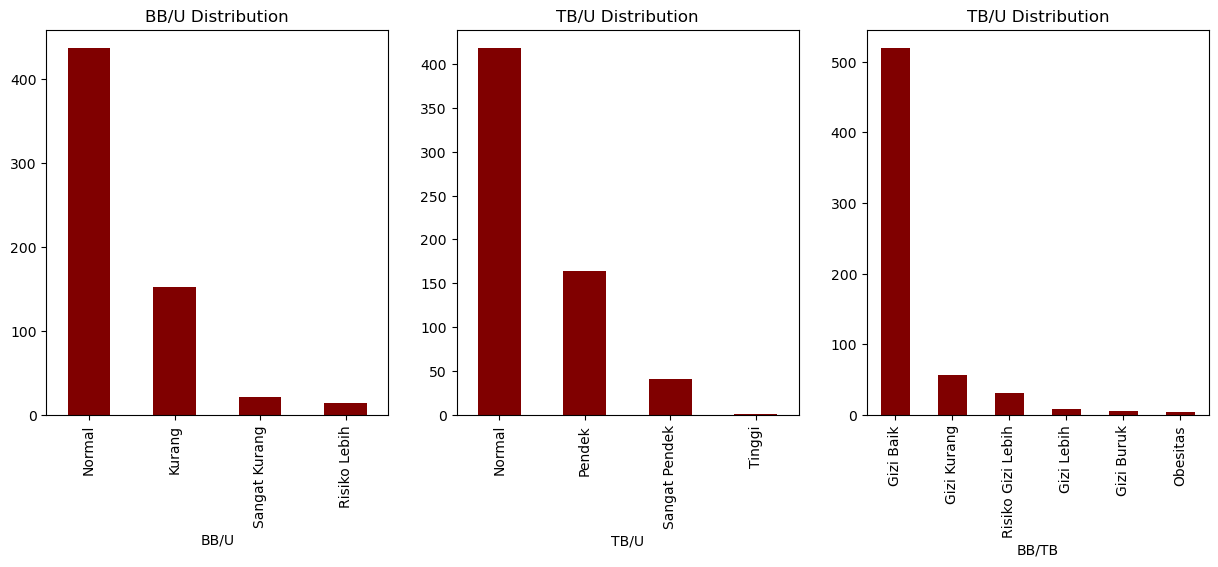

In [85]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
df['BB/U'].value_counts().plot.bar(color='maroon', ax=axs[0])
axs[0].set_title('BB/U Distribution')

df['TB/U'].value_counts().plot.bar(color='maroon', ax=axs[1])
axs[1].set_title('TB/U Distribution')

df['BB/TB'].value_counts().plot.bar(color='maroon', ax=axs[2])
axs[2].set_title('TB/U Distribution')

plt.show()

In [86]:
print(df['BB/U'].unique())
print(df['TB/U'].unique())
print(df['BB/TB'].unique())

['Normal' 'Kurang' 'Sangat Kurang' 'Risiko Lebih']
['Normal' 'Pendek' 'Sangat Pendek' 'Tinggi']
['Gizi Baik' 'Gizi Kurang' 'Risiko Gizi Lebih' 'Gizi Buruk' 'Gizi Lebih'
 'Obesitas']


In [87]:
df[df.columns[-3:]]

,BB/U,TB/U,BB/TB
0,Normal,Normal,Gizi Baik
1,Normal,Normal,Gizi Baik
2,Normal,Normal,Gizi Baik
3,Normal,Normal,Gizi Baik
4,Normal,Normal,Gizi Baik
...,...,...,...
619,Normal,Normal,Gizi Baik
620,Kurang,Pendek,Gizi Baik
621,Kurang,Normal,Gizi Kurang
622,Kurang,Pendek,Gizi Baik


In [88]:
df['BB/U'].unique()

array(['Normal', 'Kurang', 'Sangat Kurang', 'Risiko Lebih'], dtype=object)

In [93]:
df[df.columns[:7]]

,JK,usia ukur,Berat,Tinggi,ZS BB/U,ZS TB/U,ZS BB/TB
0,0,58,13.1,97.5,0.52,1.24,-0.53
1,1,57,12.2,98.5,-1.94,-0.89,-1.87
2,1,56,12.6,95.5,-1.43,-1.15,-0.95
3,0,55,14.2,99.3,-1.42,-1.96,-0.40
4,1,53,13.2,97.0,-1.38,-1.18,-0.97
...,...,...,...,...,...,...,...
619,1,9,7.0,67.5,-1.59,-1.75,-0.81
620,0,9,7.6,67.5,-2.38,-2.52,-1.21
621,1,7,6.5,65.0,-2.69,-1.97,-2.22
622,1,7,6.1,65.5,-2.41,-2.46,-1.43


In [97]:
X2 = df_test[df_test.columns[:8]].drop(columns='LiLA')
Y2 = df_test[df_test.columns[-3:]]
X2, Y2 = np.array(X), np.array(y)

In [46]:
X = df[df.columns[:7]]
y = df[df.columns[-3:]]
X, y = np.array(X), np.array(y)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [48]:
X_train

array([[ 0.  , 48.  , 14.1 , ..., -1.21, -1.98, -0.11],
       [ 1.  , 19.  ,  9.4 , ..., -0.71, -3.56,  1.49],
       [ 0.  , 45.  , 12.1 , ..., -1.62, -2.05, -0.62],
       ...,
       [ 0.  , 14.  ,  9.2 , ..., -1.85, -0.42, -2.41],
       [ 0.  , 16.  ,  9.3 , ..., -2.13, -2.19, -1.25],
       [ 1.  , 29.  , 11.4 , ..., -1.08, -1.46, -0.28]])

## Random Forest
### The Model

In [49]:
RF_model = RandomForestClassifier(n_estimators = 500)
RF_multi_target = MultiOutputClassifier(RF_model, n_jobs=-1)
RF_multi_target.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(n_estimators=500),
                      n_jobs=-1)

Testing using 30% Data

In [50]:
RF_multi_target.score(X_test,y_test)

0.964

Testing using new dataset

In [100]:
RF_multi_target.score(X2,Y2)

0.9855769230769231

In [52]:
RF_ypred = RF_multi_target.predict(X_test[[0]])

## Naive Bayes Classifier

In [54]:
nb_model = GaussianNB() 
nb_multi_target = MultiOutputClassifier(nb_model, n_jobs=-1)
nb_multi_target.fit(X_train, y_train)

MultiOutputClassifier(estimator=GaussianNB(), n_jobs=-1)

Testing Using 30% data

In [55]:
nb_multi_target.score(X_test,y_test)

0.856

Testing Using new Data

In [101]:
nb_multi_target.score(X2,Y2)

0.8493589743589743

## Decision Tree

In [103]:
DT_model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=2, min_samples_leaf=1, max_features=None)
DT_multi_target = MultiOutputClassifier(DT_model, n_jobs=-1)
DT_multi_target.fit(X_train, y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1)

Testing 30% Data

In [104]:
DT_multi_target.score(X_test,y_test)

0.988

Testing using new data

In [105]:
DT_multi_target.score(X2,Y2)

0.9903846153846154

In [58]:
DT_ypred = DT_multi_target.predict(X_test)

In [59]:
for i in range(3):
    print(classification_report(y_test.T[i], DT_ypred.T[i]))

               precision    recall  f1-score   support

       Kurang       0.99      1.00      0.99        69
       Normal       1.00      0.99      1.00       167
 Risiko Lebih       1.00      1.00      1.00         5
Sangat Kurang       1.00      1.00      1.00         9

     accuracy                           1.00       250
    macro avg       1.00      1.00      1.00       250
 weighted avg       1.00      1.00      1.00       250

               precision    recall  f1-score   support

       Normal       0.99      1.00      1.00       169
       Pendek       1.00      1.00      1.00        67
Sangat Pendek       1.00      1.00      1.00        13
       Tinggi       0.00      0.00      0.00         1

     accuracy                           1.00       250
    macro avg       0.75      0.75      0.75       250
 weighted avg       0.99      1.00      0.99       250

                   precision    recall  f1-score   support

        Gizi Baik       1.00      1.00      1.00      

/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [60]:
y_test[0]

array(['Normal', 'Normal', 'Gizi Baik'], dtype=object)

## Test Predict

In [61]:
dtes = np.array([[1,59,16.2,104,-0.75,-1.05,-0.17],
                 [1,59,13.2,101,-2.24,-1.68,-1.83]])
dtes

array([[  1.  ,  59.  ,  16.2 , 104.  ,  -0.75,  -1.05,  -0.17],
       [  1.  ,  59.  ,  13.2 , 101.  ,  -2.24,  -1.68,  -1.83]])

In [62]:
RF_ypred = RF_multi_target.predict(dtes)
RF_ypred

array([['Normal', 'Normal', 'Gizi Baik'],
       ['Kurang', 'Normal', 'Gizi Baik']], dtype=object)